## **Observations and Insights**

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [2]:
# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")
combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


### Answer

In [3]:
# Checking the number of mice in the DataFrame.
count_of_mice = combined_df['Mouse ID'].value_counts()
count_of_mice.count()

249

----------------------------------------------------------------------------

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Copy original df into new 
dup_mice_df = combined_df.copy()

In [5]:
# Select only columns used
duplicate_mice = dup_mice_df[['Mouse ID', 'Timepoint']].drop_duplicates()
# drop duplicates
duplicate_mice

,Mouse ID,Timepoint
0,k403,0
1,k403,5
2,k403,10
3,k403,15
4,k403,20
...,...,...
1888,z969,25
1889,z969,30
1890,z969,35
1891,z969,40


In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
# ALL ROWS
dup_mice_all_rows = combined_df.copy()
# Filter out the duplicate data that was dropped
dup_mice_all_rows2 = dup_mice_all_rows[dup_mice_all_rows[['Mouse ID', 'Timepoint']].duplicated()]
dup_mice_all_rows2

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
duplicate_mouse_identified = dup_mice_df[ dup_mice_df['Mouse ID'] == 'g989' ].index
dup_mice_df.drop(duplicate_mouse_identified , inplace=True)
dup_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
# Checking the number of mice in the clean DataFrame.
# COMPLETELY removed the duplicate. Did NOT leave one original.
count_of_mice2 = dup_mice_df['Mouse ID'].value_counts()
count_of_mice2.count()

248

In [9]:
# Checking the number of mice in the DataFrame.
# Duplicate not removed
count_of_mice = combined_df['Mouse ID'].value_counts()
count_of_mice.count()

249

## **Summary Statistics**

Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_stats_df = dup_mice_df.copy()
summary_tumor_vol_regimen = summary_stats_df[["Drug Regimen", "Tumor Volume (mm3)"]]
grouped_summary = summary_tumor_vol_regimen.groupby("Drug Regimen")

# Create series for each request before inputting into a DF
grouped_tumor_vol_mean = grouped_summary.mean()
grouped_tumor_vol_med = grouped_summary.median()
grouped_tumor_vol_var = grouped_summary.var()
grouped_tumor_vol_std = grouped_summary.std()
grouped_tumor_vol_sem = grouped_summary.sem()
# This method is the most straightforward, creating multiple series and putting them all together at the end.
# Create a DF with all data requested
combined_group_vol_reg = pd.DataFrame({"Mean": grouped_tumor_vol_mean["Tumor Volume (mm3)"],
                                      "Median": grouped_tumor_vol_med["Tumor Volume (mm3)"],
                                      "Variance": grouped_tumor_vol_var["Tumor Volume (mm3)"],
                                      "Std Div": grouped_tumor_vol_std["Tumor Volume (mm3)"],
                                      "SEM": grouped_tumor_vol_sem["Tumor Volume (mm3)"]
                                      })
combined_group_vol_reg.head()

,Mean,Median,Variance,Std Div,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


### Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

This method produces everything in a single groupby function.

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function.
summary_tumor_vol_regimen.groupby('Drug Regimen').agg(
    Mean=pd.NamedAgg(column='Tumor Volume (mm3)', aggfunc='mean'),
    Median=pd.NamedAgg(column='Tumor Volume (mm3)', aggfunc='median'),
    Variance=pd.NamedAgg(column='Tumor Volume (mm3)', aggfunc='var'),
    Std_Div=pd.NamedAgg(column='Tumor Volume (mm3)', aggfunc='std'),
    SEM=pd.NamedAgg(column='Tumor Volume (mm3)', aggfunc='sem')
)

,Mean,Median,Variance,Std_Div,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## **Bar Plots**

Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.

In [12]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.
# dup_mice_df is the dataframe holding no duplicate mice values.
bar_data_df = dup_mice_df.copy()

# New DF with only columns used
bar_data_df2 = bar_data_df[["Mouse ID","Drug Regimen","Timepoint"]]

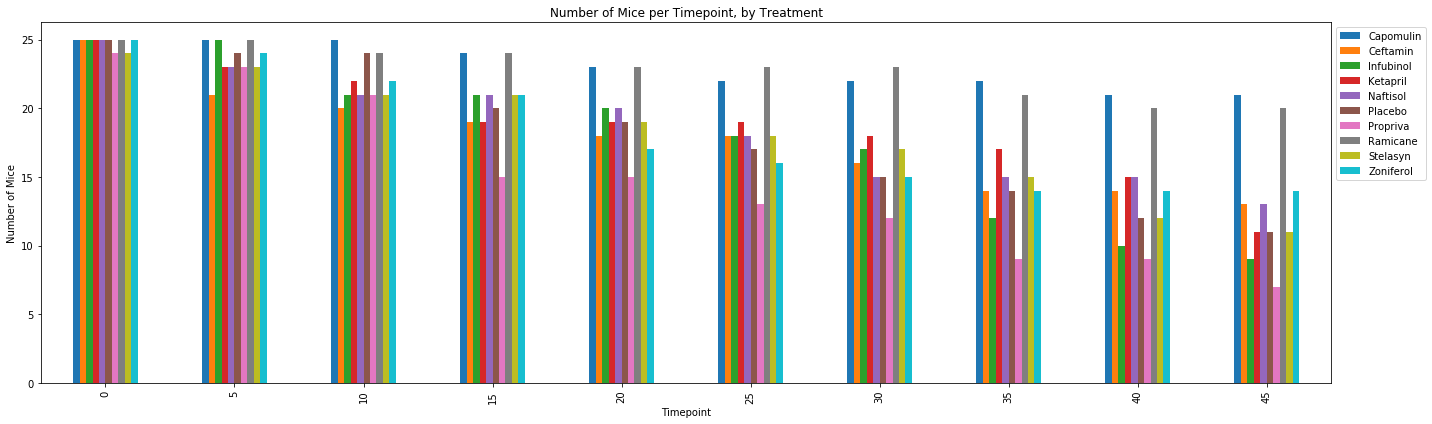

In [13]:
# Group by 'Timepoint' and 'Drug Regimen' to 'Mouse ID'. Count how many in 'Mouse ID', then how many in each 'Timepoint'.
# Plot as a Bar Chart, stacked, set figure size for visability, add a title.
group_bar_data_df2 = bar_data_df2.groupby(['Timepoint', 'Drug Regimen'])['Mouse ID'].count().unstack(1).plot(kind='bar', figsize=(20, 6), title='Number of Mice per Timepoint, by Treatment')
# Add custom Y Label
group_bar_data_df2.set_ylabel("Number of Mice")
# Move legend outside of chart; was overlapping information with 'best'
group_bar_data_df2.legend(bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.

In [14]:
# Find X-Axis label range
x_axis = bar_data_df2['Timepoint'].unique()

In [15]:
# Set index to Drug. Sorting for .loc searching. 
bar_data_df2_index = bar_data_df2.set_index('Drug Regimen')
bar_data_df2_index

,Mouse ID,Timepoint
Drug Regimen,,
Ramicane,k403,0
Ramicane,k403,5
Ramicane,k403,10
Ramicane,k403,15
Ramicane,k403,20
...,...,...
Naftisol,z969,25
Naftisol,z969,30
Naftisol,z969,35


In [16]:
# Search Drug Regimens by timepoint then count
# Counts for drug 
Ramicane = bar_data_df2_index.loc['Ramicane', 'Timepoint']
Ramicane_counts= Ramicane.value_counts()

Capomulin = bar_data_df2_index.loc['Capomulin', 'Timepoint']
Capomulin_counts= Capomulin.value_counts()

Infubinol = bar_data_df2_index.loc['Infubinol', 'Timepoint']
Infubinol_counts= Infubinol.value_counts()

Placebo = bar_data_df2_index.loc['Placebo', 'Timepoint']
Placebo_counts= Placebo.value_counts()

Ceftamin = bar_data_df2_index.loc['Ceftamin', 'Timepoint']
Ceftamin_counts= Ceftamin.value_counts()

Stelasyn = bar_data_df2_index.loc['Stelasyn', 'Timepoint']
Stelasyn_counts= Stelasyn.value_counts()

Zoniferol = bar_data_df2_index.loc['Zoniferol', 'Timepoint']
Zoniferol_counts= Zoniferol.value_counts()

Ketapril = bar_data_df2_index.loc['Ketapril', 'Timepoint']
Ketapril_counts= Ketapril.value_counts()

Propriva = bar_data_df2_index.loc['Propriva', 'Timepoint']
Propriva_counts= Propriva.value_counts()

Naftisol = bar_data_df2_index.loc['Naftisol', 'Timepoint']
Naftisol_counts= Naftisol.value_counts()

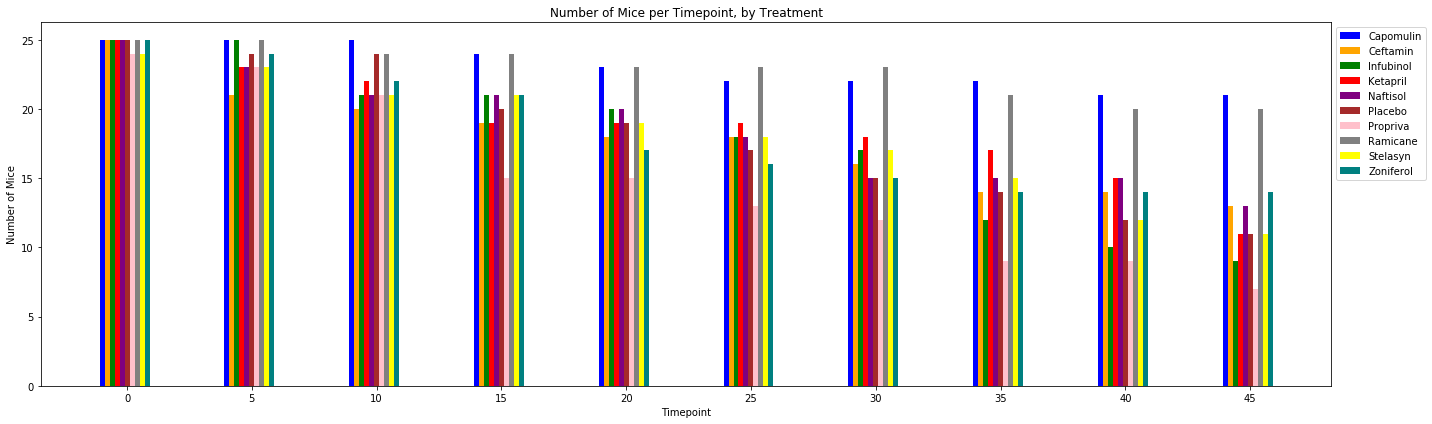

In [17]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
width=.2
plt.figure(figsize=(20,6))

# Capomulin count
plt.bar(x_axis - 1.0,
        Capomulin_counts,
        width=width,
        color="blue", 
        label='Capomulin')

# Ceftamin count
plt.bar(x_axis - .8,
        Ceftamin_counts,
        width=width,
        color="orange", 
        label='Ceftamin')

# Infubinol count
plt.bar(x_axis - .6,
        Infubinol_counts,
        width=width,
        color="green", 
        label='Infubinol')

# Ketapril count
plt.bar(x_axis - .4,
        Ketapril_counts,
        width=width,
        color="red", 
        label='Ketapril')

# Naftisol count
plt.bar(x_axis - .2,
        Naftisol_counts,
        width=width,
        color="purple", 
        label='Naftisol')

# Placebo count
plt.bar(x_axis,
        Placebo_counts,
        width=width,
        color="brown", 
        label='Placebo')

# Propriva count
plt.bar(x_axis + .2,
        Propriva_counts,
        width=width,
        color="pink", 
        label='Propriva')

# Ramicane count
plt.bar(x_axis + .4,
        Ramicane_counts,
        width=width,
        color="grey", 
        label='Ramicane')

# Stelasyn count
plt.bar(x_axis + .6,
        Stelasyn_counts,
        width=width,
        color="yellow", 
        label='Stelasyn')

# Zoniferol count
plt.bar(x_axis + .8,
        Zoniferol_counts,
        width=width,
        color="teal", 
        label='Zoniferol')

# Tick labels
plt.xticks(x_axis)
# Call legend
plt.legend(bbox_to_anchor=(1, 1))
# Add Title
plt.title("Number of Mice per Timepoint, by Treatment")
# Add x-label text
plt.xlabel("Timepoint")
# Add y-label text
plt.ylabel("Number of Mice")
# Tight layout view
plt.tight_layout()
# Show graph
plt.show()

## **Pie Plots**

In [18]:
pie_plot_data = dup_mice_df.copy()

In [20]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mice_gender_df = pie_plot_data['Sex'].value_counts()
mice_gender_df

Male      958
Female    922
Name: Sex, dtype: int64

In [22]:
mice_labels = ['Male', 'Female']

### Generate a pie plot showing the distribution of female versus male mice using pandas

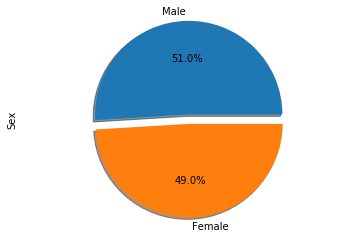

In [25]:
# PLOT: PIE
# Generate a pie plot showing the distribution of female versus male mice using pandas
mice_gender_df_pie_pandas = pie_plot_data['Sex'].value_counts().plot(kind='pie', x=mice_gender_df, explode=(0.1,0), labels=mice_labels, autopct="%1.1f%%", shadow=True)
mice_gender_df_pie_pandas
plt.axis('equal')
plt.show()

### Generate a pie plot showing the distribution of female versus male mice using pyplot

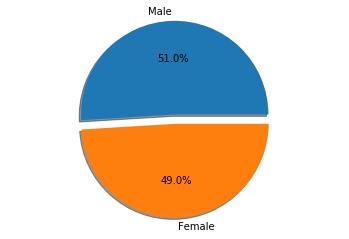

In [26]:
# PLOT: PIE
plt.pie(
    mice_gender_df,
    explode=(0.1,0),
    labels=mice_labels,
    autopct="%1.1f%%",
    shadow=True
)
plt.axis('equal')
plt.show()

## **Quartiles, Outliers and Boxplots**

In [27]:
quartiles_outliers_df = dup_mice_df.copy()

In [28]:
quartiles_outliers_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


### Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

In [591]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

In [29]:
final_tumor_volume_df = quartiles_outliers_df.drop_duplicates(subset=['Mouse ID'], keep="last", inplace=False)
final_tumor_volume_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
1859,z314,Stelasyn,Female,21,28,5,45.934712,0
1862,z435,Propriva,Female,12,26,10,48.710661,0
1872,z581,Infubinol,Female,24,25,45,62.754451,3
1882,z795,Naftisol,Female,13,29,45,65.741070,3


In [30]:
final_tumor_volume_df.columns

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype='object')

In [31]:
filtered_final_tumor_volume_df = final_tumor_volume_df[['Mouse ID', 'Drug Regimen', 'Tumor Volume (mm3)']]
filtered_final_tumor_volume_df

,Mouse ID,Drug Regimen,Tumor Volume (mm3)
9,k403,Ramicane,22.050126
19,s185,Capomulin,23.343598
29,x401,Capomulin,28.484033
39,m601,Capomulin,28.430964
49,g791,Ramicane,29.128472
...,...,...,...
1859,z314,Stelasyn,45.934712
1862,z435,Propriva,48.710661
1872,z581,Infubinol,62.754451
1882,z795,Naftisol,65.741070


In [34]:
new_index = filtered_final_tumor_volume_df.set_index(['Drug Regimen']).sort_values(by=['Drug Regimen','Tumor Volume (mm3)'], ascending=True)
new_index

,Mouse ID,Tumor Volume (mm3)
Drug Regimen,,
Capomulin,s185,23.343598
Capomulin,m601,28.430964
Capomulin,x401,28.484033
Capomulin,f966,30.485985
Capomulin,u364,31.023923
...,...,...
Zoniferol,g296,68.163195
Zoniferol,w575,68.401286
Zoniferol,q511,68.611061


In [762]:
regimen_list = new_index.index.unique('Drug Regimen').to_list()
regimen_list

['Capomulin',
 'Ceftamin',
 'Infubinol',
 'Ketapril',
 'Naftisol',
 'Placebo',
 'Propriva',
 'Ramicane',
 'Stelasyn',
 'Zoniferol']

# **LEFT OFF HERE 4/26 9:02pm**

In [810]:
quantile_df = pd.Series({"Regimen": "Quartiles"})

In [821]:
# Loop through all regimens and return tumor volume quantile
# NEED TO ADD TO SERIES/DATAFRAME BEFORE GRAPHING
for x in regimen_list:
    temp = new_index.loc[ x, "Tumor Volume (mm3)"]
    regimen_quartiles = temp.quantile(q=[.25, .5, .75])
 #   quantile_df = quantile_df.append(regimen_quartiles)
    print(f"Regimen: {x}")
    print(f"{regimen_quartiles}")


Regimen: Capomulin
0.25    32.377357
0.50    38.125164
0.75    40.159220
Name: Tumor Volume (mm3), dtype: float64
Regimen: Ceftamin
0.25    48.722078
0.50    59.851956
0.75    64.299830
Name: Tumor Volume (mm3), dtype: float64
Regimen: Infubinol
0.25    54.048608
0.50    60.165180
0.75    65.525743
Name: Tumor Volume (mm3), dtype: float64
Regimen: Ketapril
0.25    56.720095
0.50    64.487812
0.75    69.872251
Name: Tumor Volume (mm3), dtype: float64
Regimen: Naftisol
0.25    52.079510
0.50    63.283288
0.75    69.563621
Name: Tumor Volume (mm3), dtype: float64
Regimen: Placebo
0.25    52.942902
0.50    62.030594
0.75    68.134288
Name: Tumor Volume (mm3), dtype: float64
Regimen: Propriva
0.25    49.119739
0.50    55.591622
0.75    62.689368
Name: Tumor Volume (mm3), dtype: float64
Regimen: Ramicane
0.25    31.560470
0.50    36.561652
0.75    40.659006
Name: Tumor Volume (mm3), dtype: float64
Regimen: Stelasyn
0.25    52.476596
0.50    62.192350
0.75    69.103944
Name: Tumor Volume (mm3

In [820]:
quantile_df

Regimen    Quartiles
0.25         32.3774
0.5          38.1252
0.75         40.1592
0.25         48.7221
             ...    
0.5          62.1923
0.75         69.1039
0.25         49.9883
0.5          61.8401
0.75         66.7942
Length: 61, dtype: object

In [761]:
Capomulin_regimen = new_index.loc['Capomulin',"Tumor Volume (mm3)"]
Capomulin_regimen_quartiles = testttt1.quantile(q=[.25, .5, .75])
Capomulin_regimen_quartiles

,Tumor Volume (mm3)
0.25,45.875867
0.50,55.793278
0.75,65.053624


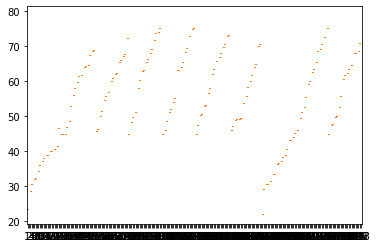

In [823]:
plt.boxplot(new_index)
plt.show()

In [662]:
quartiles = new_index.quantile(q=[.25, .5, .75])
quartiles

,Tumor Volume (mm3)
0.25,45.875867
0.50,55.793278
0.75,65.053624


In [604]:
# Sort by ascending
# final_tumor_volume_df = final_tumor_volume_df.sort_values(by='Tumor Volume (mm3)', ascending=True)
# final_tumor_volume_df

In [598]:
regimen = filtered_final_tumor_volume_newIndex['Tumor Volume (mm3)']

### Generate a box plot of the final tumor volume of each mouse across four regimens of interest

In [564]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## **Line and Scatter Plots**

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen



## **Correlation and Regression**

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
